## k-means clustering 

k-means clustering is an unsupervised learning algorithm, i.e., our data does not contain labels. Instead, we classify our datapoints by grouping data into clusters based on their distance to cluster centers.

Here the details of the algorithm.
1. Initialize k clustercenters 
2. Repeat until converged:
    - assign data points to their nearest clusters
    - update cluster centers by calculating mean of assigned datapoints

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline  

### Implementation of k-means clustering algorithm

In [2]:
def InitializeClusters(data, k):
    #input: data: numpy array with size (#samples, #featues)
    #input: k: integer
    #returns: clusters: array with size (k, #features)
    datapoints = data.shape[0]
    clusters = data[np.random.randint(0,datapoints, k), :]  #pick k random datapoints from data
    return clusters

In [3]:
def CalculateDistance(datapoint, clusters):
    #input: datapoint: 1-D numpy array with size (#features)
    #input: clusters: numpy array with size (k, #features)
    #returns: 1-D numpy array with size (k)
    #Euclidean distance
    return np.sqrt(np.sum((np.square(clusters-datapoint)), axis = 1)) #sum along all features in each datapoint axis = 1

In [4]:
def AssignToClosestCentroid(data, clusters):
    #input: data: numpy array with size (#samples, #featues)
    #input: clusters: numpy array with size (k, #features)
    #returns: labels: 1D numpy array with size (#samples) 
    labels = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        labels[i] = np.argmin(CalculateDistance(data[i, :], clusters))     #assign label to closest cluster
    return labels

In [5]:
def UpdateCentroids(data, labels, clusters):
    #input: data: numpy array with size (#samples, #featues)
    #input: clusters: numpy array with size (k, #features)
    #input: labels: 1D numpy array with size (#samples) 
    #returns clusters
    for i in range(clusters.shape[0]):  #loop through k cluster
        clusters[i] = np.mean(data[labels == i], axis = 0)   #calculate mean along all datapoints in cluster (axis=0)
    return clusters

Now we can define the optimization loop:

In [6]:
def kmeansclustering(data, k, iterations = 100):
    #input: data: numpy array with size (#samples, #featues)
    #input: k: integer (number of clusters)
    clusters = InitializeClusters(data, k)
    labels = AssignToClosestCentroid(data, clusters)
    for i in xrange(iterations):
        labels = AssignToClosestCentroid(data, clusters)
        clusters = UpdateCentroids(data, labels, clusters)
    return labels

### Apply k-means to Iris dataset

The Iris dataset can be downloaded from the UCI machine learning repository. The dataset has 1050 training examples with four numerical features (sepal length, sepal width, petal length, petal width) and three different classes. 

As mentioned above, k-means is an unsupervised learning algorithm. Thus, even though we have class labels for the Iris data, we will just not use them. 

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [8]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


To gain more insight into the data, let's first plot it with the labels:

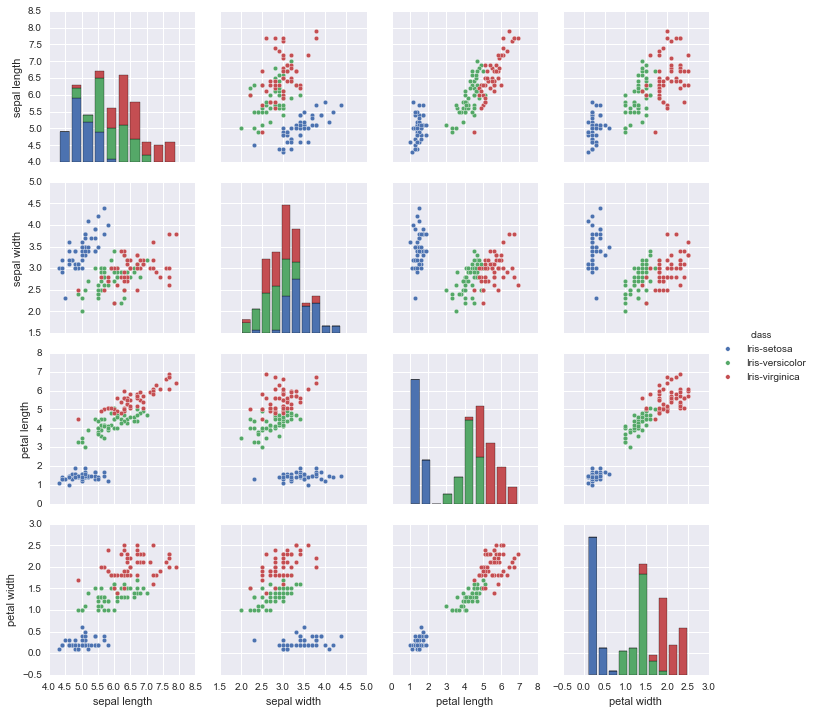

In [9]:
sns.pairplot(df, vars = ['sepal length', 'sepal width', 'petal length', 'petal width'],  hue = 'class')

And without labels:

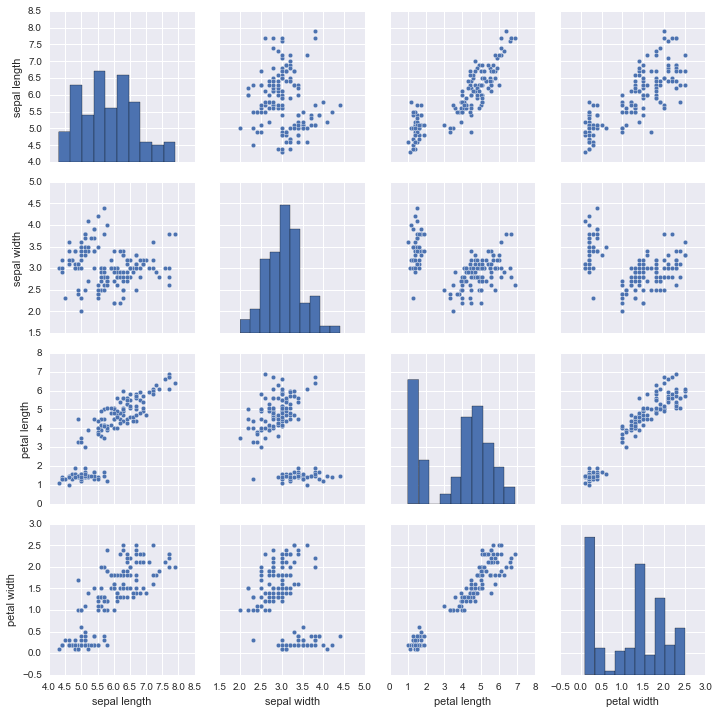

In [10]:
sns.pairplot(df, vars = ['sepal length', 'sepal width', 'petal length', 'petal width'])

Since k-means clustering is a distance-based algorithm, we need to normalize the individual features:

In [11]:
scaler = StandardScaler()  #use scikit-learn's standardscaler
df[['sepal length', 'sepal width', 'petal length', 'petal width']] = scaler.fit_transform(df[['sepal length', 'sepal width', 'petal length', 'petal width']])

Convert relevant columns from Pandas dataframe into numpy array:

In [12]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']].values

Run k-means algorithm and add predicted labels as new column to dataframe:

In [13]:
labels =  kmeansclustering(X, 3)   
df['predicted'] = labels

Plot results:

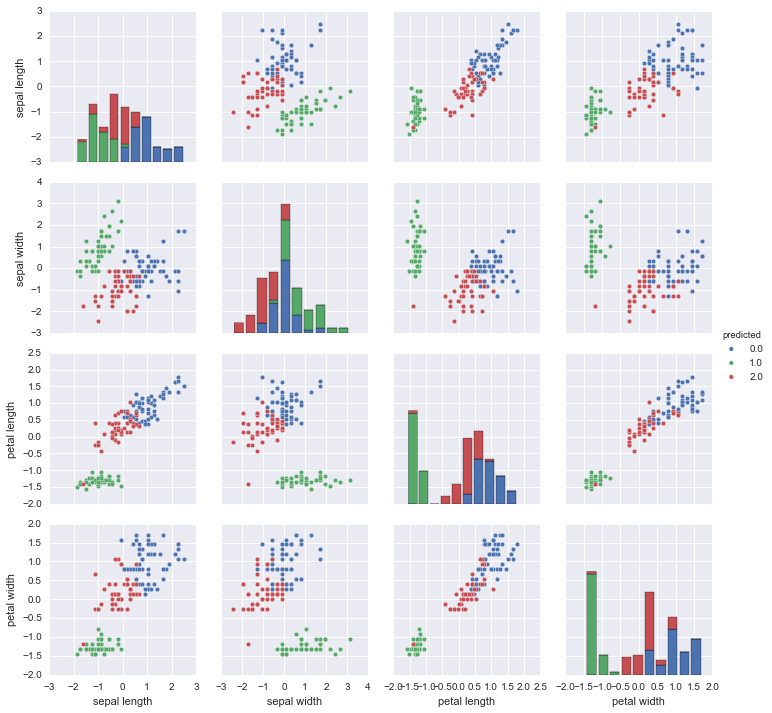

In [14]:
sns.pairplot(df, vars = ['sepal length', 'sepal width', 'petal length', 'petal width'],  hue = 'predicted')

### Cluster quality

When we run k-means on our data, we notice that the results are not always exactly the same, and sometimes, the results even seem to be wrong to us. For example, the data of Iris-virginica is sometimes assigned to two different clusters, even though it is visually obvious to us that it must be a separate cluster from the Iris-setosa and the Iris-versicolor. Thus, we can conclude that k-means does not always converge to its most optimal solution. In fact, the solution is very much dependent on the first random initialization of the cluster centers.

A way to measure the quality of our clusters is by calculating the so-called distortion function. The distortion function is the sum of squared distances of all datapoints to their respective cluster center.

In [15]:
def distortionfunction(X, labels, k):
    #input: X: numpy array with size (#samples, #featues)
    #input: labels: 1D numpy array with size (#samples) 
    #input: k: integer: number of clusters
    #returns: distortion: float
    #
    #calculate current clustercenters:
    clusters = np.zeros((k, X.shape[1])) #initialize 
    for i in range(k):  #loop through clusters
        if len(X[labels == i]) >0:
            clusters[i] = np.mean(X[labels == i], axis = 0) 
    
    #calculate distortion function:
    distortion = 0
    for i in range(k): #loop through clusters
        distortion += np.sum((X[labels ==i] - clusters[i])**2)
    return distortion
  

Let's run k-means 10 times and see how if the distortion function differs:

In [16]:
for i in range(10):
    labels =  kmeansclustering(X, 3)   
    print distortionfunction(X, labels, 3)

141.154178134
142.110637131
140.968378955
192.037174092
192.037174092
141.154178134
142.110637131
142.110637131
141.154178134
142.110637131


So obviously, some of the runs of k-means clustering were better in minimizing the distortion function. In real application, we would run k-means a couple of times and pick the clustering with the lowest value of the distortion function.

Another way to obtain better cluster quality is by smarter initialization, which is done by using the k++ means algorithm.

### Number of clusters k

For the Iris dataset, we know beforehand that we have three distinct clusters k. However, for real unlabelled data, we usually don't know the idal k, and thus, we need to find the best value of k.

One way to determine k is the so-called elbow method. In this method, we run k-means for different numbers of k, and then plot the distortion function as a function of k. The ideal number k is around the point where the slope of our curve changes, i.e., at the elbow.

Note that the distortion function is expected to decrease with k, since the distances of datapoints to the clusters needs to become smaller the more clusters we have. 

Let's see how this curve looks for the Iris data:

In [17]:
def ElbowCurve(X, kmin, kmax, n_runs = 10):
    #input: X: numpy array with size (#samples, #featues)
    #input: kmin, kmax: integer, cluster limits
    #input:  n_runs: integer, how many times to run k-means for each k
    #returns: two lists clustersizes (integer list) and distortions (float list)
    
    clustersizes = range(kmin, kmax+1)   #list for k's
    distortions = []  #empty list for results
    for csize in clustersizes:
        meandistortion = [] #empty list 
        for j in range(n_runs):
            labels =  kmeansclustering(X, csize)  
            meandistortion.append(distortionfunction(X, labels, csize))    
        distortions.append(min(meandistortion)) #append best run of k-means for each clusters   
    return clustersizes, distortions
def PlotElbowCurve(clustersizes, distortions):
    #input: list clustersizes (integer list) and list distortions (float list)
    plt.figure()
    plt.plot(clustersizes, distortions,  color = 'b')
    plt.scatter(clustersizes, distortions, marker ='D', color = 'b', s = 50)
    plt.xlabel('# clusters')
    plt.ylabel('Distortion')

In [20]:
clustersizes, distortions = ElbowCurve(X, 1, 10, n_runs = 10)

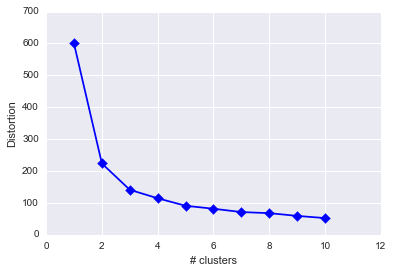

In [21]:
PlotElbowCurve(clustersizes, distortions)

As expected for the Iris dataset, or elbow appears somewhere around 2-3 clusters. 